# Part 6B: KMeans Cluster Analysis

The goal of this notebook is to explore the clusters and try to find a cluster of reviews that shows signs of fake reviews.

Recall, signs of fake reviews include:
- extreme ratings
- unverified purchases
- grand claims
- shorter reviews

In [2]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read in dataframe that was saved from KMeans modelling which contains cluster labels
df = pd.read_hdf('df_recon_25_kmeans_Aumented_DF.h5')

In [4]:
df.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,...,s_well,s_wonderful,s_work,s_work s_great,s_work s_well,s_worked,s_worth,s_would,s_year,cluster
0,-0.774194,0.130718,-0.000477,-0.021876,-0.017040,-0.390108,0.027169,-0.189852,-0.592332,0.900153,...,-0.007405,-0.003035,-0.022122,-0.007116,-0.000506,-0.006763,-0.005747,-0.005424,-0.002480,8
1,-0.025511,0.130969,-0.000726,-0.020380,0.014421,0.518709,0.027204,-0.189691,-0.591538,-0.101172,...,0.001249,-0.008481,-0.024936,0.002453,-0.014069,0.007629,-0.007422,-0.000763,-0.002815,13
2,-0.027927,0.131374,-0.000902,-0.024874,-0.011501,0.155444,0.527129,-0.189695,-0.591579,-0.099567,...,-0.001807,-0.008689,-0.024268,-0.004949,-0.015753,-0.007231,0.977977,-0.006115,-0.009342,13
3,0.225000,0.131145,-0.000197,-0.010150,-0.006712,-0.299351,-0.472857,-0.189916,0.406675,-0.100662,...,-0.006456,-0.005412,-0.025414,-0.003705,0.000746,0.003979,-0.015254,-0.007348,-0.020953,7
4,0.220052,0.131171,0.000056,0.006983,0.001890,0.518661,0.527130,-0.190000,0.409226,-0.100673,...,-0.004567,-0.000948,-0.019598,-0.008728,-0.004536,-0.003423,0.001133,-0.012412,-0.004151,19


Note that df was reconstructed from principal components so the values can be negative.

### Cluster Analysis

Let's begin by looking at the non-token features.

In [5]:
#getting names of non-token features and cluster for analysis
non_tokens_clust = list(df.columns[0:12]) + ['cluster']

In [6]:
#getting names of token features and cluster for analysis
tokens_clust = list(df.columns[12:])

#### Non-token Features
Let's look for clusters with mainly extreme ratings, unverified purchases, lower amount of helpful votes and shorter reviews.

##### Rating

In [7]:
#let's look at average rating by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
26    0.223272
12    0.223212
6     0.223149
1     0.223149
9     0.223139
24    0.223109
19    0.223071
7     0.223064
22    0.223053
2     0.223053
3     0.223042
17    0.223030
20    0.223001
21   -0.027151
25   -0.098417
10   -0.101275
23   -0.170864
15   -0.189705
18   -0.210364
11   -0.210727
13   -0.215920
16   -0.216189
0    -0.526180
4    -0.775403
14   -0.776850
5    -0.776906
8    -0.776959
Name: overall, dtype: float64

From here we can see that about half of the clusters have a mean of 0.223 rating. As we know, the data was heavily skewed to high ratings (ie. 5) so this on its own is not informative. What is interesting though is clusters 5 and 16 have the lowest ratings.

##### Verified Purchase

In [8]:
#let's look at average verified purchase by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
10    0.131051
9     0.131033
16    0.131009
11    0.131008
18    0.131004
13    0.130998
7     0.130996
26    0.130984
22    0.130983
3     0.130973
19    0.130968
2     0.130733
23    0.116316
24    0.104850
6     0.101588
0     0.095531
17    0.080074
21    0.079168
8     0.068314
1     0.060576
5     0.047310
4     0.011995
14   -0.037088
25   -0.437935
20   -0.868992
15   -0.869077
12   -0.869078
Name: verified, dtype: float64

Very interesting. **Clusters 22 and 8** both have the most negative values which indicate they have the largest number of **unverified** purchases. These are good candidates too look into further.

##### Votes

In [9]:
#let's look at average votes by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
12    6.895780e-04
15    6.671384e-04
20    6.202639e-04
25    5.885387e-04
4     4.162905e-04
14    3.652162e-04
26    1.420946e-04
2     1.400212e-04
5     1.376493e-05
11    4.729673e-07
7    -3.197071e-05
9    -3.343387e-05
3    -3.463429e-05
18   -3.483095e-05
16   -3.895418e-05
10   -5.788250e-05
22   -5.938908e-05
13   -6.039459e-05
19   -6.287912e-05
23   -2.005553e-04
24   -2.416317e-04
8    -2.510905e-04
0    -2.524673e-04
1    -3.054200e-04
6    -3.234598e-04
21   -3.317713e-04
17   -3.617160e-04
Name: vote, dtype: float64

Clusters 22 and 8 have the highest number of votes. Strange considering they also had the highest number of unverified purchases.

##### Word Count

In [10]:
#let's look at average review word count by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
15    0.021527
25    0.021276
12    0.020989
20    0.017995
4     0.005891
26    0.005432
2     0.004938
14    0.003733
18    0.003701
11    0.003544
10    0.003215
13    0.002028
16    0.001927
9     0.001892
22    0.000724
7     0.000571
3     0.000049
19    0.000047
23   -0.004345
5    -0.006168
24   -0.008928
8    -0.013046
21   -0.013059
0    -0.013133
1    -0.013169
6    -0.013290
17   -0.015517
Name: review_word_count, dtype: float64

Clusters 22 and 8 have the largest review word counts - this makes sense since they have the largest number of votes since longer reviews tend to have more information so they are more helpful. However, these clusters also have the highest number of unverified purchases which is counter-intuitive. This needs to be looked into further.

#### Reviewer Behaviour
Let's look into **reviewer behaviour**. This may shed some more insight into whats happening in these clusters.

In [11]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
25    0.810284
12    0.810186
9     0.810101
10    0.810085
26    0.809703
23   -0.034247
21   -0.053114
17   -0.065970
1    -0.070160
0    -0.070775
6    -0.075060
24   -0.137228
14   -0.137260
8    -0.148940
4    -0.153785
5    -0.157778
2    -0.188906
16   -0.189838
11   -0.189840
13   -0.189846
18   -0.189848
22   -0.189850
20   -0.189850
15   -0.189851
3    -0.189854
19   -0.189855
7    -0.189861
Name: multipleReviews_reviewer, dtype: float64

Clusters 22 and 8 are part of the lower third of clusters that have the lowest number of reviewers posting more than 1 review (ie. most reviewers post only 1 review). This sort of makes makes sense since these clusters also happen to have the highest number of unverified purchases and as we have seen before, there is a limit on the number of reviews that can be given with unverified purchases.

In contrast, clusters 13, 17, 24, 14 and 0 have the highest number of reviewers with more than 1 review. We want to keep an eye out for those clusters as well as one of our assumptions was that fake reviewers could be incentivized to give a lot of fake 5 star reviews.

In [20]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,8].sort_values(ascending=False)

cluster
14    0.408039
22    0.408026
4     0.408025
20    0.408022
3     0.408020
21    0.408018
19    0.408018
15    0.408015
13    0.407986
18    0.407876
1     0.407813
10    0.407768
12    0.398355
24    0.240673
6    -0.591830
9    -0.591954
17   -0.591957
5    -0.591979
23   -0.591990
7    -0.591992
2    -0.591998
16   -0.592000
8    -0.592008
0    -0.592023
11   -0.592025
Name: reviewer_five_star_only, dtype: float64

Cluster 22 among highest cluster with only 5-star reviewers. Notice cluster 8 is amongst the lowest. It you scroll up, it also did not possess extreme ratings as it was in the middle of the pack. This eliminates cluster 8 as we would expect extreme ratings from fake reviews.

From the newly mentioned, clusters 14, 13 and 24 have high amount of 5-star reviewers. Let's revisit their features from above.
- all had among the highest overall ratings
- cluster 13 (and somewhat 14,24) had low amount of verified purchases
- clusters 13 and 14 had high amount of votes where as 24 had the lowest (this raises suspicion on cluster 24)
- clusters 13 and 14 had higher word counts where as 24 was amongst the lowest (this raises further suspicions on cluster 24)
- and as we have seen, all had high amount of reviewers that post multiple reviews

Based on the above, I want to keep a close eye on **cluster 24 and 22** as we move along the analysis.

In addition, I went back and identified cluster 18 as having almost identical features as cluster 24. The main difference between the 2 is cluster 24 has many reviewers that posted more than 1 review where as cluster 18 is the opposite. So I will include **cluster 18** in further analysis as well.

#### Top Tokens per cluster
Let's look at the top tokens per cluster.

In [24]:
#getting the mean token value per cluster
df_tokens = df.loc[:,tokens_clust].groupby('cluster').mean() 

In [25]:
#getting review tokens
df_review = df_tokens.iloc[:,0:1153]

In [26]:
#gettings summary tokens
df_summary = df_tokens.iloc[:,1153:]

In [28]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 22
cluster=22
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_skin         0.022568
r_razor        0.013561
r_product      0.013151
r_using        0.011240
r_hair         0.011105
r_review       0.010927
r_shave        0.010418
r_ive          0.010025
r_face         0.009837
r_use          0.009801
r_feel         0.009543
r_used         0.009429
r_also         0.009342
r_cream        0.009123
r_day          0.008566
r_recommend    0.008131
r_year         0.007840
r_eye          0.007703
r_amazing      0.007348
r_shaver       0.007331
Name: 22, dtype: float64
s_great    0.037677
s_love     0.032237
s_best     0.027594
Name: 22, dtype: float64


There is no clear trend in the top words in cluster 22. Let's look at cluster 24.

In [37]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 24
cluster=24
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_love                   0.059927
r_great                  0.048390
r_good                   0.028893
r_great r_product        0.016714
r_excellent              0.015234
r_nice                   0.011589
r_work r_great           0.010057
r_thank                  0.009268
r_perfect                0.009075
r_beautiful              0.007560
r_good r_product         0.007318
r_product                0.006703
r_favorite               0.006528
r_thanks                 0.006233
r_awesome                0.005321
r_excellent r_product    0.004746
r_love r_product         0.004593
r_best                   0.004534
r_blush                  0.004309
r_described              0.004086
Name: 24, dtype: float64
s_five s_star    0.492332
s_five           0.492275
s_star           0.382379
Name: 24, dtype: float64


Ok this is clear. There are more general positive terms in this cluster. This fits perfectly in our description of fake reviews which would use more general postive terms and lacking personal details.

Cluster 24 is emerging as a clear candidate.

In [38]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 18
cluster=18
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_love                   0.068001
r_great                  0.042623
r_good                   0.030749
r_perfect                0.018975
r_great r_product        0.018291
r_excellent              0.013513
r_awesome                0.011508
r_nice                   0.009661
r_amazing                0.009618
r_loved                  0.009607
r_product                0.008806
r_thank                  0.007181
r_work r_great           0.006084
r_thanks                 0.005791
r_good r_product         0.004858
r_love r_product         0.004644
r_excellent r_product    0.004246
r_beautiful              0.004180
r_wonderful              0.003551
r_best                   0.003237
Name: 18, dtype: float64
s_five s_star    0.492297
s_five           0.492256
s_star           0.382085
Name: 18, dtype: float64


Just like cluster 24, cluster 18 contains general positive terms so cluster 18 is also a candidate for fake reviews.

Now let's visualize the top tokens that are associated with grand claims (e.g. best product ever!) and let's see which clusters have the highest amount of these tokens

### Visualizing tokens

Let's look at some tokens e.g. excellent, love and great product.

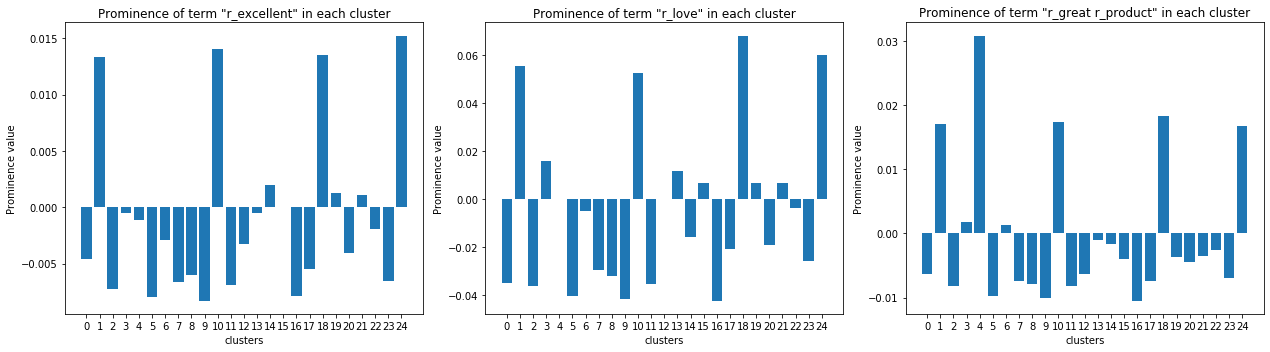

In [53]:
tokens = ['r_excellent','r_love','r_great r_product']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

As can be seen, clusters 24 and 18 are among the highest, if not highest, clusters for the words excellent, love and great product. We can therefore conclude that these clusters are of lower quality given the shorter word lengths and use of general positive terms. This gives credenece that if fake reviews existed, they would most likely be contained within these 2 clusters.

When I did LDA topic modelling, I noticed one topic had prominent terms such as exchange, discount, received product, unbiased and honest review which all indicate that some reviews were given in exchange for product. These are highly concerning because these reviews may be unreliable. Let's see if we can find a cluster with these terms from the Kmeans model.

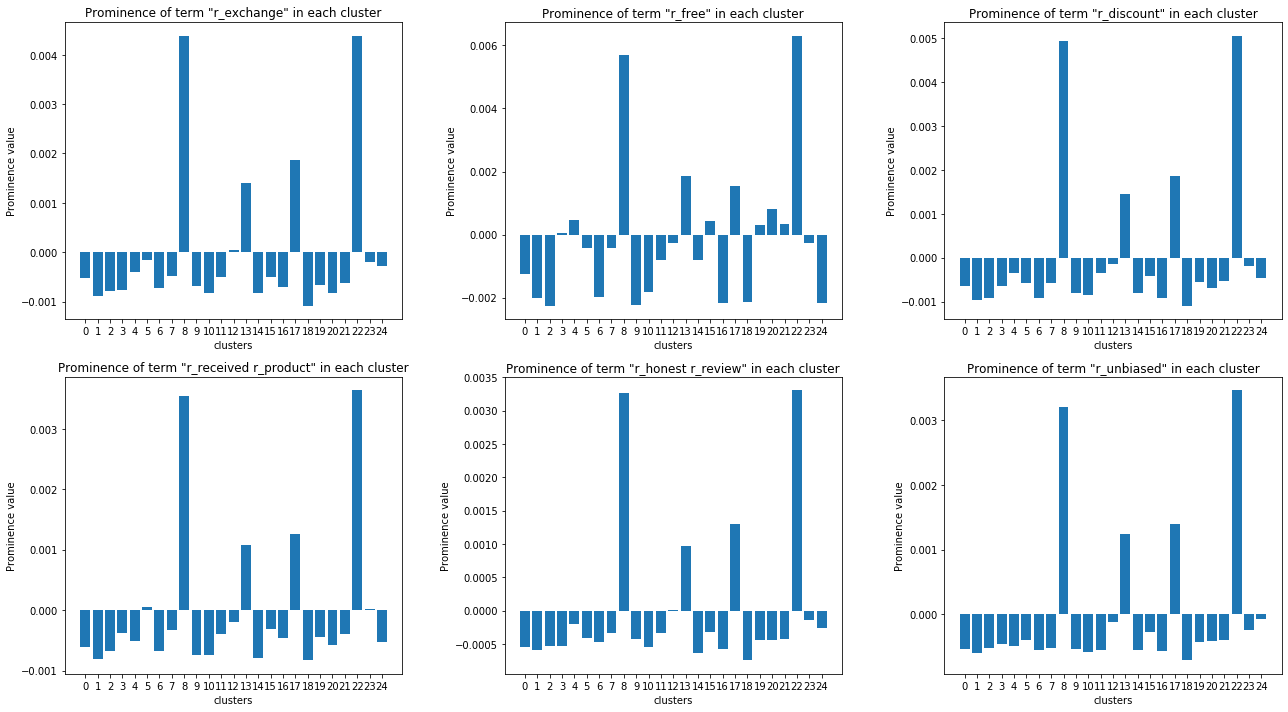

In [55]:
tokens = ['r_exchange','r_free','r_discount','r_received r_product','r_honest r_review', 'r_unbiased']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(2,3, figsize=(18,10))
for token in range(len(tokens)):
    plt.subplot(2,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

Wow! Cluster 22 (and 8) has the highest values for all the terms mentioned. This solves the mystery of cluster 22. Seemingly people were giving 'honest' or 'unbiased' reviews in exchange for receiving product for free or at a discount. This may explain why the word count is longer as people were trying to give proper reviews of the products. Perhaps the reason there is low amount of verified purchases is beacuse the reviewers were given the product for free externally from Amazon in exchange for reviews. 

This means these reviews aren't necessarily fake but they may be unreliable because the reviews in cluster 22 are all 5 stars so seemingly the reviewers are more incentivized to give good reviews even though they claim to be giving unbiased reviews. As opposed to cluster 8, which only has 2, 3 and 4 star reviews which seems to contain more realistic reviews.

#### Conclusion:
- clusters 24 and 18 have the most telltale features of fake reviews (5 stars, low word count, use of general positive terms)
- the key difference between clusters 24 and 18 is reviewer behaviour. Reviewers in cluster 24 post more than 1 review where as in 18, they have only posted 1 review. This may indicate that some fake reviewers review multiple products where as in other cases, reviewers use different accounts perhaps to review the same product.
- cluster 22 contains reviews of people who may have been incentivized to give good reviews; this does not necessarily mean the reviews are fake but they may be unreliable

# Let's take a look to the reviews of some cluster (near centroids)


In [9]:
import functions_library as fl
import numpy as np

In [6]:
df_raw=fl.pipedf('All_Beauty.json.gz')

In [7]:
# prendo le review relativa ad uno dei cluster di interesse
df_cluster_selected=df.loc[df["cluster"]==24]

In [12]:
#per ogni review del cluster calcolo la distanza euclidea tra essa e il centro del cluster
cols=len(df_cluster_selected.axes[1])
near_record=[]
a=np.array([0.22297965567561417, 0.13097004759056535, 2.8059786932247295e-05, 0.0009454537436706134, 0.00410158119715552, -0.02452937254417862, 0.017426542279810338, -0.18984840387889718, 0.4077879872295697, -0.10014694458712006, -0.009705146095760946, 0.06832208551551033, 0.00039030154430167135, 0.0004803557092665471, -0.0003080965428838381, 0.00023197962668712862, 0.00020051607753203705, 0.0017880289133381704, 0.0008657648050463713, 0.00030486469683994096, 0.0012616034348690104, 0.001078774341386282, 0.0010826049061007843, 0.0007442966246285986, -0.0004017404595864167, 0.00022249872569094235, -0.00023922162976974034, -0.0006701483876984737, -0.00012811600496122127, 0.00031205086911987727, 0.00018023112172603446, 0.00015234130522330275, 0.0007039941272537273, -0.0015706635593076498, -0.0008785249383325173, 7.972696334240796e-05, 0.0025905663976149287, 0.0001812636995684568, -0.0005909983263951389, 0.0054395541699194805, 0.0001307857210038028, 8.387817911032305e-07, -0.00035246134142869905, -0.00011048352553918127, 0.0016919108515407644, 0.0005986661133242321, 0.0009891242838453481, 0.0003533133023732939, 0.00022705448991991808, 0.0005181357464861601, -9.952731953944166e-05, 0.0005130350786809351, 0.0011885937312548025, 0.0012818306825291602, -0.0004369031212401994, 0.001373525281017536, 0.00025346284795164096, 0.000322858849846147, 0.0010157133325676242, 0.00017341215001568538, 0.00019356301296705793, 0.00024784959793471446, 0.00018268826922155363, 0.0001194504055727583, 0.00019735375788380733, 0.00016393737381426796, -0.0010912913170283342, 0.0008129592627857416, 0.00048112911769652126, 0.0023773309632067834, 0.0006857512253818747, 0.002520021353806095, -0.0001612350930689857, 0.0011535631483687015, 0.0007650078749964318, -0.002681318836282777, 0.0004088901629222284, 0.0001615619675458219, 0.0003078588362011381, -7.525302123502739e-05, 0.00028203052722732577, 0.0011259626445037725, -0.0024092427236948413, -0.0007339461941525872, 0.0003825156576836064, 0.0008811525061857902, -0.00044916723641811056, -0.0009097488013904626, -7.46925998706228e-06, -0.00015657998523178267, -0.0027020638960397487, -0.000479162328252671, -0.00041470234947597027, 0.00010888809817194889, -0.0002014648442253157, -0.0006872771128172496, 1.8336983528127737e-05, 0.001331923352389911, 0.00036957117066436606, 0.00013705213669860591, -0.005816274929569006, -9.38117946300857e-05, 0.00041661383777339214, 0.000923019047535306, 0.0001695610981114879, 0.0007140217522855852, -0.00020960897501242617, -0.001616702814107791, 0.002243952594027805, -0.0004082357789950031, -0.00034598646960913896, -0.000566404379151837, -0.0003905620613516279, -0.000857741052862836, -0.0001898933817528315, -0.0007532801027962873, -0.0018625293926134209, 0.0006593827405221536, -0.0003911763580612073, 0.00030114108148243093, 0.0017015394424579999, -0.0002588999725456156, 0.00214715934894335, -0.0016231752367186064, 0.00027493559768589613, 0.0016322381956354348, -0.00022382002209003174, -0.000350407632937111, 0.00015187288956701917, -0.0007457742049095239, -0.0008563368976201782, -0.0032327315310464004, -0.002069079267246786, -0.00048359412766253956, -0.0028164432601930946, -0.000516746350684863, 0.0011358151999501067, 0.0005550713300895855, 6.090049706151214e-05, -0.0007156676286664397, 0.0003637271157454414, -0.0016077495321183011, 0.0008560363640615724, 0.00014541846062607642, -0.001987812385122874, -0.0002128620007252105, -0.0007589386069154743, -0.0002552982621802978, 1.6277063409620064e-05, 0.0006272144820063212, 0.0008140960424320198, 0.00014879906023842267, -0.00047216551649446447, 0.0004344243309552201, -3.89293250082646e-05, 0.00013445930395452338, 0.0002087992101402288, 0.0005589753494111247, -5.87143605055713e-05, 0.0002705507991159289, -0.00019490062772519552, -0.0038141326963425756, 0.000528683620091351, -0.00020918053285224264, 0.000894998556020758, -0.00032297552839228205, -0.0004240369168059695, -0.000435557606992753, 1.8608364320948716e-05, -0.0004709375644580905, 0.0002889060690804933, 8.137678793672918e-05, -0.00017228989262492667, 0.0006786406191131942, -0.0005126833922450953, 0.00030012411372136634, -0.00042783357836225844, -0.00031189690898371754, 6.418765311262556e-06, -0.0007151466704010378, -0.00010811199656641889, 0.000839651086438475, -0.010702039157396138, 2.812339383433495e-05, 0.0004003788884551979, -0.0002601785538316739, 0.00010885433029542992, 0.0002841824105307781, -9.312003750521915e-06, -0.0004897886015953808, -0.0008847612541663758, 0.0003685665225634657, -0.00014965873199088928, 0.0010188531957539986, -0.0005293144935816816, -0.00011808146611457955, -0.00033140509386587807, -0.00021118668991229053, 0.0003019722666289721, 3.460181064164698e-05, -0.000322747216970223, -0.0004906858189000114, 0.001687522223852942, 0.0006077343240674599, 0.000811338804131424, 0.00032289604989069827, -0.0006022450115357506, 0.00026947739846993127, 0.0001298684036352584, 0.0001279669729829013, -0.0003641776820519369, 4.45851307980114e-05, 0.0021233030913878274, 0.0002815430320002638, 0.0004434980478614215, -0.0007808295603808923, -0.00013466445315048295, 0.00194473243789261, -0.000995457497121731, 0.00033155050936518215, 0.0006746045610133545, 0.0012990734132010023, 0.0009140859820323749, -3.578335031959989e-05, -7.113954139632335e-05, 0.0012555370343082161, -0.006133767012687562, -8.618942506425286e-06, 0.0017270058437018048, 8.738089375460108e-05, 0.0002650538681894329, -0.0005740771429913227, -0.00029179899288424033, 0.0015878201095973002, 0.009358674648678423, -0.0007974326970285845, 0.0005926979222218709, -0.0007030694872829655, -0.0011681775897151264, 0.0012759779152840215, 0.00027820437564549566, 0.003973810914041148, 0.0011481860595947454, 0.0002934701868658694, -0.0019667836693276833, -0.00037905267732925405, -0.0006251542860032824, 0.014821226455774605, 0.00045710916097016756, -0.0007966314317927211, -0.0014154266810020547, 0.00024104492981673418, -8.107695184156559e-05, -0.0020954538396452706, 0.0023112259231678504, 0.0038435242798422857, -0.0008223602254798925, -0.0006986818654992774, 0.0007532813638924751, -0.0035919448629877834, -0.0007032195826146764, -0.0021230423517951654, 0.0010875103815653833, -0.0006164238304437865, 0.00038752191281618965, 0.0007659361357793967, 2.8718370359844523e-05, -0.000583734315549765, 0.00037118339875769844, -0.00024025057651660698, 0.0002904875055912221, 0.00024072100463594902, 0.00040010976807917605, -0.0007918862680641283, 0.000601946431787562, 0.005508046271382791, 0.0014731184742393366, -9.069056864989447e-05, 0.0007112159622251427, 2.031039550959399e-06, 0.00012160959434059763, -0.00022459465169129245, -0.00023106181771633813, 0.0005392167375726415, -0.00014459759706337834, 0.0026050875324074695, 0.00045393235299221173, 0.00017447244573767854, 0.0013086429766966685, 2.429827854877472e-05, 0.0005553808405447739, 0.0011300039992637027, 1.8624270308863146e-05, -0.00022052915653510098, 0.00016607979091974237, -1.4183288049506349e-05, 0.0007527788931412085, 0.00020605006752466034, -0.00031792403020448456, -0.00014216872442780515, -0.0011951582665129168, 0.00012812193238820118, 0.0009446154916539976, 0.0003747828229266225, 0.00041273023164654313, 0.001010480761150483, 0.0022066641294325013, 0.00019887126035508546, -0.0006847977223032806, -6.608120242583679e-05, 0.0025357996484959623, 0.0008498921673442806, 0.0004185078589675531, 0.0006456350654524178, -5.6730133748642106e-05, 0.0008680113346338522, -2.0250838608738554e-05, 0.0011123989450602433, -0.004321350217741493, -0.001023186556093908, -9.123918706967827e-05, -0.0008240851326265865, -0.0005517533511524594, -0.0004918805147725394, -9.60956709581024e-05, -0.0004597719652788826, -0.003900134645889895, -0.0007652742313241482, 0.00012667795841202255, -2.2832819049295157e-05, -3.627089703521751e-05, -2.6474911513000242e-05, 0.0006685960144135936, 0.0013448025767620717, 0.0001483360677645671, 0.0002674655250965053, -0.0004062462013462376, -5.3459989830411914e-05, -0.0007283873633594747, -0.0005018324510800582, -0.00026822320514179607, 0.00043302604496223596, -0.00029391262468547833, -0.0003966831537767785, 0.002312113194336149, -0.0010098215666361878, -0.00024026427747266183, 0.00014373694239105004, -0.003074296999487868, -6.637834911087603e-05, -0.002547831473436587, -0.00021053021606502598, -0.00022620116333485105, -0.0007161063326258476, -0.0015590159853820728, -0.001568080318921183, -0.0004180342034554952, -9.699779425350257e-05, 0.0004386000750704117, 0.0018910395449154838, 0.000782643169803245, 0.0006791279168209323, 0.0014452337934938, 0.0010247671757698542, 2.5241609585255277e-05, 0.002805368655656822, 0.0004275526702936768, -0.0005795174204771191, -0.00023545255897434818, -5.357049101112213e-05, 9.837680571302929e-05, -0.00029917891845280707, -0.0009387481856992681, -0.0010577797989096437, -0.0009512976566586452, -0.0010948341773653865, 3.2809938271752086e-05, 0.003509010043139185, 8.732726971854231e-05, -0.00025009045541396973, -0.00028878665985473023, 0.0028693959437708677, -0.0002230952289307038, -6.313054701457926e-05, -0.002188928782913964, 0.0008164687793462482, 0.0010113541837279605, 0.000800809311569625, -0.00014696755268876947, -3.6527794117990615e-05, -9.133118053693555e-05, -0.0012096945625667205, 1.387508718905697e-06, -0.0005524598014737587, 7.89659074627242e-05, -0.0002454912296157568, 0.0008884867333723589, 0.001481306723998165, -0.004049520205020731, -0.0008031814488246114, -0.00030041615122333005, 0.0009089460940399247, 0.0010819241732133947, -0.0005573571282447697, -0.00021265402353718555, 0.0013881550896472743, 0.0004105793227724649, -0.00047456966323140707, -0.00076149322757906, -7.313605734079166e-05, -6.019427050660479e-05, 0.001144735657913406, -1.6409094402146282e-05, 0.000798402056155865, 0.0013262906244803925, -0.0002772595366035221, 0.0021318546158535364, -0.01587834137842556, -0.00011262534583472777, -0.000619736494080348, -0.002199977692892291, -0.0025322895445362027, -0.000496335192853047, 3.676609810570491e-05, -0.0001409766412778466, 0.021916184634523998, 0.00042978528284401673, -0.0006678618710281347, -0.0039015128005631325, -0.0011202466282933987, -0.0007157106882939876, -0.0006450956723412749, 0.0009141577484878035, -0.000492898186073197, -0.0014073724507305796, 0.0004745523992911581, 0.01044638519445864, 8.752388957482217e-05, 0.0014250924962530835, -0.0019172471694364113, -2.513532623805119e-05, 6.120424417402055e-05, 0.0005258216340274036, 0.00016016475631475772, -8.252371995028465e-05, -0.0015350345950653035, -2.229885750006604e-05, 0.0003760782348369852, -0.0004092352796040143, 0.000445954437268086, -0.00039369359733700785, -0.000419765485565245, 9.646625822095252e-06, 2.7150356021054837e-05, 0.001581890884647667, -0.000584304460094507, 0.0003209847431487954, 0.003189239930404924, 0.0016085464837997804, 0.00010994046494915418, -0.00019094707216948947, -0.000748554907913784, -0.0004784752417572984, 0.0019068659046611964, 0.0016562711981378733, 0.0007083622084780144, 4.870491142080016e-05, 0.000989979707330283, -0.00033585883439850707, 0.00013444142565992705, -0.00020352855741160165, 0.0007797928073315979, -0.0008017768836729993, -0.00043791796784215333, -0.00032785191166714346, 3.372471625460546e-05, 0.0005315850984394568, -0.00037467361267379327, -0.001581690998703774, 0.0013648395471954255, 0.0021799634904533065, 0.0004271507130895482, -0.001103993211138955, 0.0005417314031740018, -0.00024095767944152136, 0.0024104898979390326, 0.00012739987604633413, -0.0004264195031411029, -0.00025528834103391487, 0.003550087645701805, 0.0003775686185273203, 0.0002045946061556749, 0.0007444544376558825, 0.00013880838739784986, 0.00015077471178098355, 0.00028238066652520026, 0.00046554178893700674, 0.00016661857137336003, 0.001314643762910863, 0.000202678125393005, -4.168779248639741e-05, -1.5276712785327676e-05, 0.00036543400949146695, -0.00029124559209299733, -0.0005815919412273559, -0.0002067737514150668, 0.0003856615140127, 0.0005334759362595671, 0.000529035086854279, 0.00023670292403884223, 0.0013470005059079665, -0.0003190501550602535, 0.002097044490290082, -0.002280063590090296, 0.00764718282614627, 2.4490037216863764e-05, 0.0031200004384897267, 0.0014706173246844712, 0.0018859728705889766, -0.00017073307719916905, 0.0016046944305833286, 6.457858165831334e-06, 0.006400142538471926, 0.001097203122241925, 0.00044142047680772317, 0.00035239182353726667, -6.651369500377684e-06, -0.0003798239285036633, -0.0008993487097398437, 0.0002479388942429682, 0.0008332286785415496, 0.00021063267493068788, -0.0008260139388682683, 6.111968848610981e-05, 0.003826504565557428, 0.0018229464544004103, 0.0005814025086951294, 9.282974849209686e-05, 0.0006779862424533686, -9.548470210939217e-05, 0.0004290038101084319, -0.0014831073778059937, -0.001235563418414502, 0.00013490115066508375, 0.001333532252250229, -0.0012034359559381794, -0.00070508175618374, -0.0002548475630614961, 0.0010206898959164304, 0.0008278939313845027, 0.00027518038599109833, -8.911339827463917e-05, 0.0017816839562918131, 0.0005247942768116726, 0.0012559941953017846, 1.0743243427283419e-05, -0.0005620740725350515, 0.0012090511503857794, -0.0009893135335902604, -0.00032020349085026866, -0.0038588238529575214, -0.0008581005554628831, 0.00031144368669631245, -0.0012777822151031639, 0.0009546938445536581, -0.0006027993513983609, -0.0021114527917774767, -0.0017939572305241788, 0.0007459562171760873, -0.0001252980888307034, 0.0007088296297538478, 0.0004677092777745044, 0.0006168126044746226, 0.0004406829686614132, 0.0002781378211319065, 0.0005611708928796623, 0.0030517007342635216, -0.00025805632263663583, 0.001592622415270928, 0.0007044843513300631, 0.0024090640702270514, -0.004371440992034164, -0.0008129929979035562, -0.0006383341542850028, -0.0015049524170435292, -0.0011186169834257217, -0.0010546918400654547, -0.0002628630001737266, 0.00022157107023193244, 0.00038406485288269095, 2.119695865553437e-05, -0.019011063753442446, -0.0013944677465172377, -0.000775401192125804, -0.0006080015254881057, -0.000613659046307656, 0.0008682319498060571, -0.0046053246706395014, -0.0007439676771265676, -0.0001066680848129263, 0.00046431177733197973, -0.00035661845836083736, -0.0026600174751548085, 0.00015825555725209033, 8.20646652791999e-05, -0.0003917582639861797, 0.0006528295063927623, -0.0002589026431719403, 0.00040312184594082167, 8.223603189859506e-05, 0.0008021424873398628, 4.2841132666998486e-05, 0.0005675823436608555, -9.008560902016574e-05, 0.0005223117915827813, -0.00014359216820253708, -0.0005361175236228548, -0.0010334525587000426, -0.001116473609317519, -0.00022310913601963442, 0.00033046192483907375, -0.00030810883890943706, -0.0003111692408553517, -0.000306126357190422, 0.00044061002054830744, -0.00023304297284902793, 0.0003969177718518674, -0.0003781323680684799, -0.0001444946116668186, 8.001267710993856e-05, 0.00018394274800894047, -0.00019951475518288923, 0.0011007261691196094, 0.0003701284022827508, 0.00023339502025220043, -8.326497016706888e-05, -0.0010523769378254944, -8.861146163151559e-05, -0.0002246809214851044, -0.0002964993791875147, -0.0007969489166252593, 0.0003948445591027209, -0.0035444475778187035, 0.004688557962663677, 0.00246307153298272, 0.0001468300931113645, -0.0006276954062026146, -0.0008716639617579406, 0.00012188617748395766, 0.00035350053946293794, 0.0007282867686095072, 0.0003390593334823693, 0.000536257254723697, 0.0003222961577140121, 0.002300061471702977, 0.000457429933582777, 0.00020436071708407084, 0.008511502920224198, 0.006814899580358068, -0.0002720644978291668, -4.871793145672028e-05, 0.0009232558211375128, 0.0018541738694944133, 0.002048773798320918, 0.00044240744273729043, 0.001013441015253406, 0.001040434597749865, 0.0002442626172105017, 0.0011449767298438826, -0.008798463836462586, 0.00030649614621442974, 0.004299377722736057, 0.0003657619254702294, -0.0016862292473383354, 5.4581814883092723e-05, 7.678405243112154e-05, 0.001191473387405515, 0.00033330058784089084, -0.0004611429520694196, 0.0007113521776710925, 0.0009978986324881694, 0.0016651057306996495, 8.249717983364202e-05, 0.003455741219066765, -0.0001784406535495484, 0.00020922389255906968, 0.0004282226737255753, -0.001114950511169307, 0.0001534399651975677, -0.0046957720809519135, -0.0019220393006632013, 0.0004405676750320834, 0.00024141176679426716, 0.00225777412373465, -0.0002834315526932862, -0.00041891441255659695, -4.710536415072637e-05, -0.0005293234696076429, -0.001425005131704335, -0.0004710108802034257, 0.00015904749573786243, -0.000579533149832114, -0.0005200522038284514, -0.0005329152792033888, 0.00024475999143244514, 6.54565482577974e-05, 0.0009639984085604838, 0.0006875488701394171, 3.364242987471688e-05, 0.0004798274694332264, -0.0009313463445804748, -6.663108891107462e-05, -0.0003105534626299786, -6.49598087659754e-05, -0.0004507150265562179, -0.0015565745262398883, -0.0003244682375075113, -0.0009515960288828315, 0.001533690631038523, -0.0009509194901734614, 0.0021689712705166304, 0.0004347019701544851, 2.4207830554654614e-05, 1.1991389034710304e-05, 5.041464591115251e-05, -0.00021659987974823996, 0.0004381978667190172, -0.0013923431445831546, 0.0005240030765520514, 0.0011449431763464006, 0.00011878492196084532, -0.003705493222864932, 0.002873402390772207, -0.0009771941403197136, -0.00023917835687011272, -0.00015824003551545988, 0.00011981273642931081, -0.0004951268099084847, -0.00017284740535006954, -0.0027941181048012145, -0.0008369992925411769, -0.0018656090967300028, -0.000860795208257982, -0.0016159440442765132, 0.0015315612660543308, 0.00011500351646620362, -0.0009365570672486308, 0.0006460921173369471, -0.0005965842825157346, -0.0004522308392559411, 0.0005349326011570783, 0.00028721717456721755, -0.00020820805300835615, -0.00021176509663844978, -0.00016274127501333252, -0.0011871014402599501, 0.00015321767529964724, 0.001323579145110065, 1.5129939197337588e-05, 0.0003046700054351257, -1.2907153058426329e-05, -0.0005737363492868884, -3.4650680009690106e-05, -3.8395423752082944e-05, -0.0006041721895002804, -0.0032592084738528584, -0.0003797427484388795, 0.0009139660837838802, -0.00036585189417243655, -0.003803227219310589, -0.0004922225215138025, 0.0006927471229073784, -0.00031536745989728724, 0.0025872289775652605, 0.0002628832519968926, 0.00035806671395372663, -0.0007328621196343609, -0.0006649861812736248, 0.0017224312533800697, 4.3739599059160346e-05, 0.011115698474926036, 0.00023726084710316007, -0.0001648883083378952, -0.00010872106948172146, -0.00012410209261054557, -0.0005201685997995183, 5.0870542415552136e-05, 0.00027931011223859923, 0.0005362891341666476, -0.0010047437952341025, -0.0006122060622280752, 0.000297412345025154, -0.000357997501335202, -0.00014603503757091232, -0.00011985805297851744, 0.0029777088852190967, 0.0004746751372849214, -0.008012399331187092, -0.000559638708384105, -0.0001310823925864626, 0.0016927399663017439, -0.00019069325512103923, 0.00032104379005438093, 0.0022249156627986363, -0.0003272173880215301, -0.0005253391202970381, -0.0001259497985979564, -0.00013829868151658993, 5.027177388239028e-05, 0.0007420961526092203, 0.00025575255724695885, 0.00037350087253198473, 0.0003098619535337518, -0.0010135826814321198, 0.006798201225100567, 7.29217404381846e-05, 0.0005590997828107187, -1.154941780391513e-05, -0.00011355083934716514, 0.0021772828043590507, 0.008171755559968633, -0.00026274380310588725, 0.00011099765473771437, -0.0007163651519654865, -0.003392074337039451, -0.0005955147214154517, 0.0003880397899562904, 0.001887949669594558, 0.0008139603473853855, 0.0007480020522530361, 0.0018269685814538274, -0.0005592700688133241, -0.00012173349892271793, -0.00048277247875034066, 0.0004662093301815487, 0.000995799680559204, 0.000949208037899157, 0.0002743141032336329, 0.0002734308434897158, -0.0002269657053254469, 0.00020061577571461696, 0.000600734245715928, 0.0007777703908503551, 0.00011789932183021068, 0.004716829551009595, -0.0019708861695850555, -0.0008830905616414394, -0.0003307016474531426, 0.00011933204918420096, -0.00041769421330260597, 0.0008139112704164509, -0.0005839437485144337, -0.0014800761308437506, -0.0002613090901043097, 0.0010348139225494764, 9.83026453921813e-05, 0.001203789100949908, 1.953593597488971e-05, -0.00026891001230622806, 0.00031919771883534494, 0.0007748639598056553, 0.0006617844435464978, 0.0002771041173996284, 0.00013988335779419682, 4.0182020766969025e-05, 0.00045716157099787543, 0.000586569313960377, -0.000202545035081, -3.2736850035221254e-05, -0.0001636732314525818, 0.0018304249485170793, 0.0035431209409995984, 0.0006728752547310807, -0.0018813712556701866, -0.0002596692976982984, 0.0013963189979717301, 0.0027088615448232598, 0.0006145192825079331, 8.777077777573394e-05, -3.581805847525173e-05, 0.0008925650305921991, 0.0005800621701825961, -0.0003310043606851918, -0.001120484505157987, -0.0004629026912097153, 0.001678396396735559, 0.0004939589769702686, -0.0006234774579519808, 0.0002577427790673496, 0.00022247261920335366, -0.00100769562788934, -0.0021199413526255583, 0.0004659034404746773, 0.0017427665583786603, -0.0013575898769375688, -0.00017810305809029179, -0.0006778158462646393, -0.0007058490606593761, -5.414959468845546e-05, -0.00044525765003102934, 0.00022476827499141872, -0.0001713049210493446, -0.0006515730884810822, -0.0002769325746360048, -0.0009926936485854464, 0.0006485010062993545, -0.000152247762028074, 0.00023742934411995892, -0.0007278162302663243, 0.0011404074112743026, -0.0004700259561824954, 5.676573982187949e-06, 0.0004039292439640388, 0.00039084315551014457, 0.0017495871136694392, 0.0002729418744999165, 1.7224676861920336e-05, 0.00030997608134973565, -0.0014198353738562128, 0.002402591445050871, 0.003724657208974187, -0.0004768871251337858, 0.0002179457248354283, -0.00041992302731950614, -0.00026433978332157253, 0.001557713985668125, 0.00011800046071359589, -0.0002797089774293327, -0.002545649971912009, 0.0007709748897296313, -0.0013155511323378454, 0.0004308918102538979, 8.526067322390987e-05, 0.0006182656717748108, 0.00038421931712632275, -0.0009009386810119737, 0.0005821986706445236, -0.0006852456123052314, 0.0004882941820274378, -0.0007293665898399381, 0.0008143119429799408, -0.00018704776334836745, -0.005398328141566205, -0.0029003036015734468, 0.0001529228961300798, 0.00014483979433201261, -0.00023311617359690054, 0.0006931666243423671, -0.00021635119024067024, -0.00028483616327538904, 0.0014138780191416342, -0.00021654515267222258, 0.0020581092224744965, -6.951844535830085e-05, -0.0001676857376990931, -0.0004269793536050575, -3.506851019233919e-05, -0.00028219001419612136, 7.81561583355963e-05, 7.886742699063861e-05, -0.00029519642249494735, 0.0026131245082051282, 0.0022559351102670036, 0.0010655098748248923, -0.000488306318987451, 0.00011321743786100864, -0.002726796689861656, 0.000798371733344498, 0.002720438937469814, 0.0012326704177556772, 0.0006779644688106057, -0.00039344445982484027, 0.0001905446304514734, -0.00014833803429452783, -8.337573155870067e-05, 0.001798916131549777, 0.0002714777243186836, 9.507262629677971e-05, 0.000773250637413199, 0.002198280599317116, 4.7178102664531e-05, -0.00029871120275488656, 0.006970348752739865, -0.0007041546970043232, -1.3069802417107037e-05, 0.00016643568453697196, 1.4147463277377993e-05, 0.0007246148055530535, 0.0008892628995434731, 0.00045255145709717113, -0.0015151915082978022, 0.0006243458273707123, 0.0012284902679644836, 0.0012383218670960498, 0.002501448896020902, -0.0005473094817200289, 5.306647625430587e-05, -3.089725797335108e-05, 0.004021612659928968, 0.0011072189191759902, 0.0003000042420160686, -0.0003999901133008715, -0.0004015404968988656, -0.0012210482377540412, 0.0006496173037756689, 5.778498644227254e-05, -0.0011025371687385624, 0.0006441842873771853, -0.0008291842188354779, -0.0011276074890037488, -0.0012565084123098863, -0.00017825026894190902, -0.0002496410638316856, -0.0009886882054196118, 0.0005016474844186849, 0.0006875894653132379, -0.0007718851821135243, 0.0010022787900732355, 0.00022047246687884286, -0.0002301607141960641, 8.231470246101969e-06, 6.17230521435574e-05, -0.0013436232943172801, -0.0003658948283756309, 0.000499001644889846, 0.0006841557307878203, -0.0004208942918292902, -6.034763025679346e-06, 0.0038192860886436643, -1.966289980085659e-05, -0.000664135863862857, -0.0008317466091925887, -0.0004045096924086553, 4.3070996693455964e-05, 0.0008006602638428438, 9.708006101162732e-05, -0.000276777270424029, -2.5946307846279283e-05, 0.0007992321257015468, -0.00010679332673457331, 9.553589552381634e-05, -0.0014570480121612092, -0.000961244691670493, 0.0002503103757884497, 0.0001589983678014999, -0.0006248295010414062, 0.0014568546236506043, 0.007571185517684198, 0.0014927286996397585, 0.00079203660920317, 0.0012499099080190154, 0.0006293066035235053, 0.000518947393432372, 0.0002366546403520294, -0.00041934188831000996, 0.0007710598943872188, 0.0026845605191670296, 0.0009431537183951004, 0.0005187337387338981, 0.000260115656506991, -0.00026763007076849234, 0.001152981685153121, 0.0010114215969289039, 0.002152511482674757, 0.0008879132409136674, 0.00030144014431775614, 0.0011082199411268903, -0.0007581302054286608, -0.0004261078834031182, -0.00020546777184689025, -0.000720539785736309, -0.00023247656346507518, 0.0004649326950725506, -0.0001719034516990801, 0.0009394725490363459, 0.006950439411362834, 0.0005976516227554962, 0.0005846689042967364, 0.005725270987542457, 0.0011880414041427374, -0.0006980183718782126, -0.0010847809852189564, -0.0001907952160609782, 0.006090954107508701, 0.0015973946124545532, 0.0007374505041468834, -0.0011363342239839656, -0.0005802331004542459, 0.00029770568218312314, 1.8544692112658367e-05, -0.00023620232287276935, 0.0005593430568797677, -0.0019230438473529722, 0.0005871788560274049, 4.024622772429089e-05, -0.00037953088474664947, 0.000565369387941438, -0.0007657166544266374, -0.0023857161018444235, -0.0021001382200125955, -0.002845119840344414, -0.00020341475786839875, -0.002992636025063124, 0.0008092217966693601, -0.0009457259505620641, -3.649686423593413e-05, 0.0005292300471336865, 0.006857117658574151, 0.00017752917511749066, -0.0004498325692072714, 0.01287894212416465, -0.0004411913929978817, 0.0003296723694200945, 0.00025760143909034805, 0.0005957963462019545, 0.0004714441444813299, 0.0003723946996129648, 0.0001563587502978334, -0.0023100642184633534, 0.0009754950292963275, 0.00022662582789994504, -2.6001317230703834e-05, 0.0005279015221695408, 0.0013066908754991093, 0.0004928260618834666, 0.0012773335810572193, -0.001686628182817482, -0.0009874633956663912, -2.9874229349724588e-05, 0.10261770366993149, 0.0035676612356101154, 0.0031909052963859175, 0.0036576521522243845, 0.06124249855597391, 0.005527388656472108, 0.002967465724535917, 0.013241069494676763, 0.006252235251835906, 0.0010280287882987434, 0.0010069941870964718, 0.0029151981489477377, -0.000430618252919445, 0.000587977747293134, -1.8853233054906744e-05, -0.0012299715047411571, -0.0005412653330800063, -0.0004704711897891142, -7.311742861913415e-05, -5.673110443349546e-05, 0.0002838189197310406, 0.0005440993202965375, -0.00021323595494904778, 0.00017482002606807458, -0.0011219854031805235, 0.00036370572283466276, 0.0006919789018042889, 0.002607145234053012, -0.0009366661929650957, 0.004681604884415666, 0.0007160658391606986, 0.0012549446907298026, 0.0006530563453157787, -0.0006695795300335537, 0.00032956158855495756, -0.0003466488491159837, -0.0012215738891304772, -0.0010649371254230254, -0.002922028119829589, -0.004329386829615688, -0.00433881972436187, -0.004292165004096182, -0.010882837984614972, 0.0035424915924120158, -0.0009538397868048478, -0.0022112079950236327, -0.0015970898542687737, -0.0013242461794565103, -0.0011705999312809268, 0.00024003987663640057, -0.004436311028409542, -0.008003855355904886, -0.0013439872597818979, -0.0006139178916222481, -0.0015985010159679262, -0.0023719657681144954, -0.006405151954299623, -0.0018583020032024496, -0.004335088058093505, -0.00022920588780991511, -0.002022598451923872, 0.005781536460126507, -0.0018844842450282985, -0.004376702631201448, -0.0016529550780180913, -0.004905438550825353, -0.0007073506920996438, 0.0019190917715859001, 0.00011880799274720656, -0.001834197100962761, -0.00027373521302009136, -0.005028175171795192, -0.00045983248376313683, 0.00041076461370681463, -0.0052295509624091, -0.0008522918159724253, 0.0031056904870551214, -0.0019182422399628358, -0.0015861656331413172, -0.00047214019505448105, -0.0011513904623303942, 0.00020925767103611385, -0.004125512659964942, -0.002915224179930691, -0.000921639370095447, 0.0063597011199571524, -0.0019375085273111068, 3.957530848455303e-05, -0.11460683831071163, -0.11453561423909898, -0.0019588044020907797, -0.0020645541496518175, 0.00019608473667264033, -0.023291686620592902, -0.02332053663353538, -0.0011282887574262535, -0.003306912937178089, -0.002249529201608846, -0.0007156559599234952, -0.001158104423937711, -0.02110118949774968, -0.004189482011410986, -0.0015049609892254046, -0.0014026418773198388, 0.07894090303849523, -0.0008059350256833489, -0.00873779668761589, 0.00044175099808774654, -0.00014146101258871247, -0.004886089104619646, -0.0014270636608129579, -0.0011436542493259998, -0.00030341634432583687, -0.00114493707226754, -0.00183235815156818, -0.0019598651089954198, -0.0028193550894729533, -0.002997050156001067, 0.0008423389621577906, -0.0009981683811807036, -0.0012860602035726582, 0.0058823558361503995, -0.0013866878956294727, -0.00229280369846222, -0.0013484069880412052, -0.002494232317959491, -0.0017153992751408843, -0.0006825115449527312, -0.0015025524177613952, -0.03132055579176792, -0.002784510058723052, -0.0029883024112029016, -0.002217844006928043, -0.0013342674629303946, -0.00028172682207664194, -0.004249200184405191, -0.0009708215755833672, -0.0026215056839194797, -0.0024521911669672693, -0.0009853331896737798, 0.0010272203441188425, -0.00025250644309723663, -0.0004155001534666431, -0.012980399469306146, -0.0030655635279823804, -0.0025029085338941362, -0.004018286959253712, -0.002437208605132428, -0.0013102814544232709, -0.020442957331525912, -0.020038848311453698, -0.002687591934574421, -0.001849316465371727, -0.001803070738616487, -0.003913959030554631, -0.005077989687783336, -0.01317758848157928, -0.0024506184819926852, -0.007328168135790781, -0.0026038887757831686, 0.048223172680624704, -0.0032830471596844717, -0.0005517472568001718, -0.0024371691975492056, -0.0028499545632069004, -0.0018217927986699388, -0.00034389332459479945, -0.0032134140712225543, -2.0809685749359773e-05, -0.0019899455108565714, -0.0013237959377129444, -0.0031153748499918796, -0.003934348233051295, -0.0008766403928751969, -0.0019310649411004204, -0.0023160448779200853, -0.0019366621436280639, -0.001860649825285928, 0.000693117603384545, -0.0019079939389618369, -0.004827456358308017, -0.002095055458112178, -0.0007165636803100704, -0.12932772081358163, -0.0008679435399630034, -0.000867998661245557, 0.007863464408689637, -0.002352552887137641, -0.0020065515634598804, -0.00046999376677509284, -0.013611617931689121, -0.013563199431076658, -0.0022429344253213765, -0.00019112799268663366, -0.000996811544641209, -0.0014733836330987494, -0.009826141882002287, -0.009769293235527762, -0.0015972808476995923, -0.0032900855101354156, -0.002419956722281593, -0.0011764600160874745, -0.001966045670218027, -0.0030940131341449083, -0.0019772221037867594, -0.003021989485637514, -0.003977346763500242, -0.001993111387557155, 0.039577203927157585, -0.000299662222656529, -0.0022602603823277815, 0.6383198459609513, 0.20748611761716387, 0.04218414591367821, -0.0018665909686758236, -0.004672812220432313, -0.002304599211099628, -0.0009850203569960873,24])
for index,row in df_cluster_selected.iterrows():
    b=np.array(row)
    temp=a-b
    dist=np.sqrt(np.dot(temp.T,temp))
    near_record.append((index,dist))

In [17]:
near_record.sort(key=lambda a:a[1])
index_selected=[]
for i in range(100):
    index_selected.append(near_record[i][0])
print(len(index_selected))


100


In [18]:
pd.set_option('display.max_colwidth',None)
for index in index_selected:
    print(df_raw.loc[[index],["summary","reviewText"]])

         summary           reviewText
225949  It works  Eyelash enhancement
          summary  \
283287  It works!   

                                                                                                       reviewText  
283287  It has done wonders for a condition I have called Microscopic Colitis! I plan on ordering more very soon.  
                            summary  \
150301  Not Sure How, But It Works!   

                                              reviewText  
150301  Great for everyday or pre-play refreshing... ;-)  
                  summary  \
43844  Yes - it does work   

                                                                                                                                                                                                                                                           reviewText  
43844  I was skeptical about the ad but when I used it there seemed to be an attraction from the woman when I was out that had no

                   summary  \
307845  It actually works!   

                                                                                            reviewText  
307845  This works really good for me personally. My curls are defined and manageable. I recommend it.  
          summary  \
109430  it works!   

                                                                                                                          reviewText  
109430  As I am growing older (50+), my lashes are growing thinner.  This product has done what it says it will do.  I am impressed.  
                                                                            summary  \
115623  The patches work and do not fall off easily. My son who is 4 is able to ...   

                                                                                                                            reviewText  
115623  The patches work and do not fall off easily. My son who is 4 is able to remove the patch himself

                                            summary  \
239238  Not just a soundtrack- an epic work of art!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

                              summary  \
221059  This produce works for me....   

                                                                                                                                                                                                                              reviewText  
221059  Just started using this product and already love it.  Also use it on the skin around my mouth which has some sun damage.  It appears to be reversing the wrinkles and lines around my eyes and definitely reduces eye puffiness.  
                                     summary  \
271684  This stem cell serum works miracles!   

                                                                                                                                                                                                                                                                                                                                                              

192297  This is a great product.  Important to use it very carefully, i.e. repeated quick touches on the callused skin to avoid skin burns.\n\nWith care and patience, it will get rid of the most stubborn calluses.  I had a big one on the outside of my big toe that resisted pedicures, pumice stones, etc. for years.  The first treatment with the electric remover took twenty minutes but it REMOVED THE CALLUS.  I was very impressed!  All that's needed to keep it gone is a short treatment once a week.  
                           summary  \
225998  It works! just be patient!   

                                                                                                                                              reviewText  
225998  It works! Just be patient- it takes a couple of months to see a positive result but stick with it and you may have to cut some lashes as I have.  
        summary  \
90389  IT WORKS   

                                                                      

              summary  \
43702  DOES IT WORK?!   

                                                                                                                                                          reviewText  
43702  Upon applying this, I was able to attract over 100 women in a span of 2 hours. Maybe it was because of this stuff, or maybe it was because I am good looking.  
                   summary  \
190658  it does work! wow!   

                                                    reviewText  
190658  it does work! wow! will buy more for my entire family!  
      summary  \
69475   Works   

                                                                                                                                                                                                                                                                                                                                                  reviewText  
69475  Don't ask me why this works...b